In [2]:
import helper
import os
import glob
import cv2
import random
import torch
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

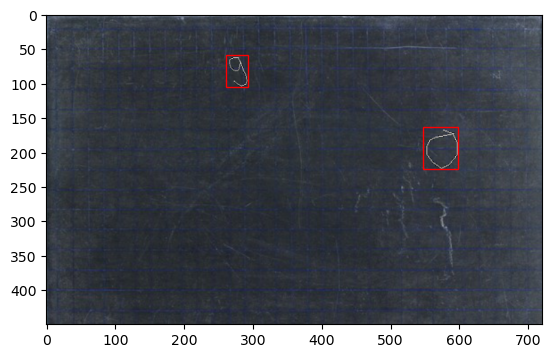

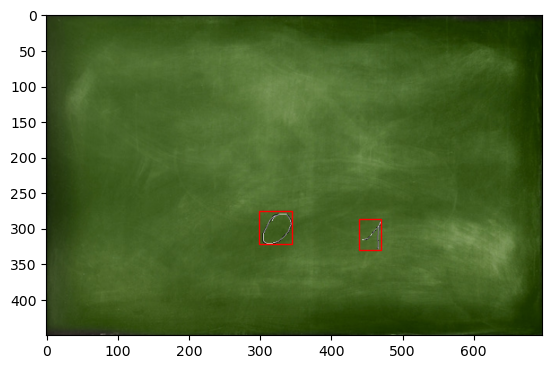

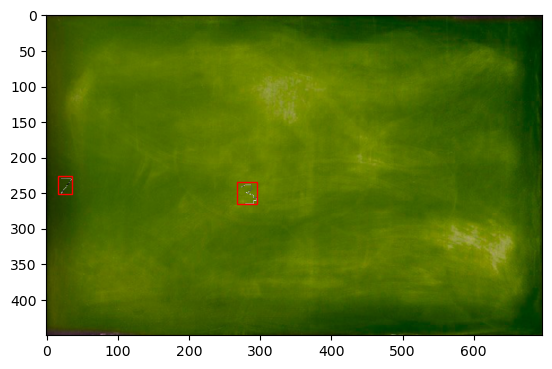

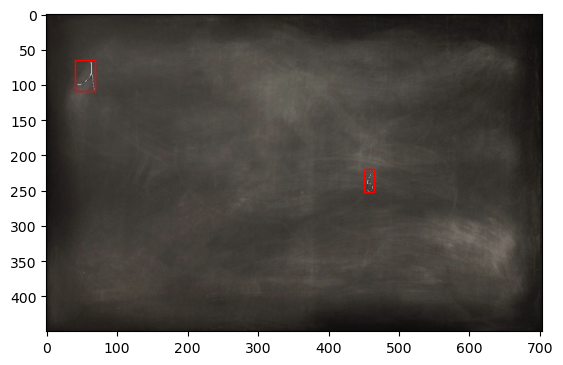

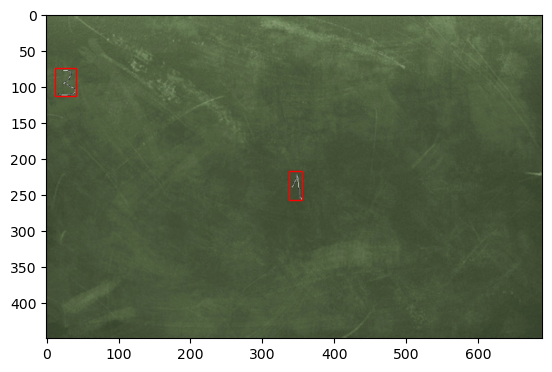

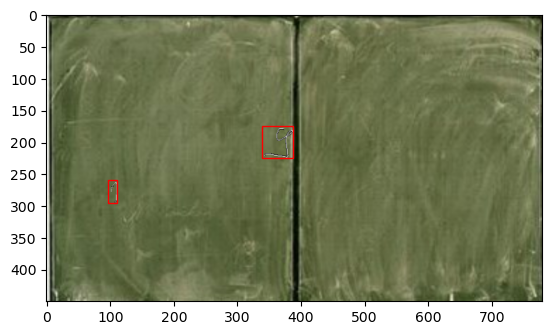

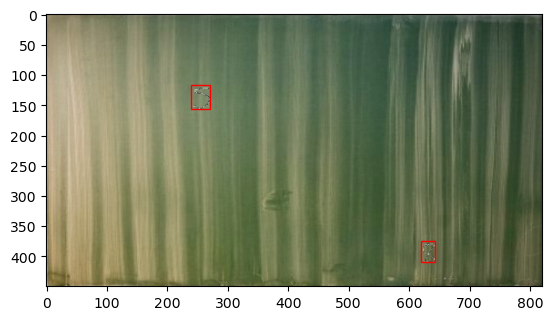

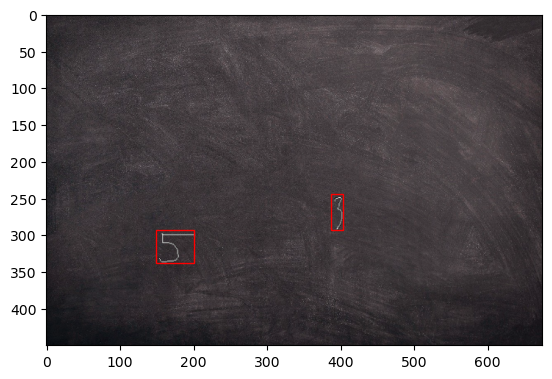

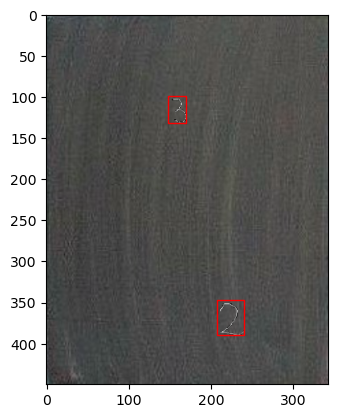

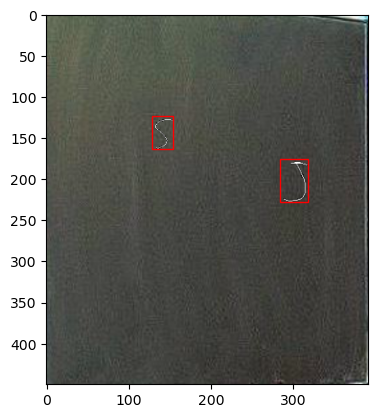

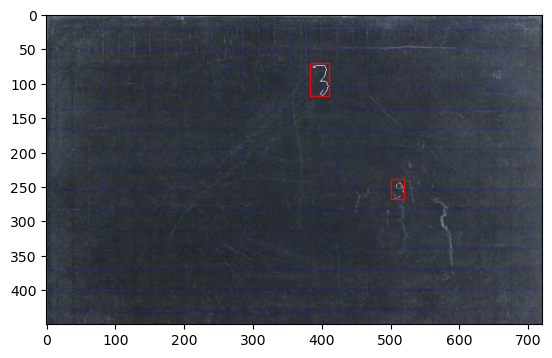

In [7]:
dataset_path = "archive\\dataset1000\\"
if not os.path.exists(dataset_path):
    os.mkdir(dataset_path)

images_path = "archive\\extracted_images\\"
background_path = "archive\\background_images\\blackboard\\*"
labels = os.listdir(images_path)
backgrounds = [cv2.imread(file) for file in glob.glob(background_path)]
images = {}
for i, j, k in os.walk(os.getcwd()):
    if images_path in i:
        images[i[-1]] = list(map(lambda x:i + '\\' + x, k))    

filename = 0
label_txt = open(dataset_path + "label.txt", 'a')

while len(os.listdir(dataset_path))-1 <= 10:
    for back in backgrounds:
        coordinates = torch.zeros((30, 4))
        label_txt.write(os.getcwd() + '\\' + dataset_path + str(filename) + ".jpg ")
        background = back
        for i in range(30):
            label_int = random.randint(0, len(labels)-1)
            label = labels[label_int]

            img_int = random.randint(0, len(images[label])-1)
            image = cv2.imread(images[label][img_int])

            background, label_line = helper.place_image_on_background(label, image, background, coordinates, i)
            
            label_txt.write(label_line)
        
        label_txt.write('\n')
        plt.imshow(background)
        plt.show()

        cv2.imwrite(dataset_path + str(filename) + ".jpg", background)
        filename += 1
        if len(os.listdir(dataset_path))-1 >= 10:
            break

label_txt.close()


